# Content-based similarities
This notebook shows the process used to calculate similarities among the informative videos maintained by the +TV4E platform. In addition, a 2D-graph shows how these items are arranged in the vector space. Thi script must be run in an offline mode to calculate the similarities. 

Library requirements:
* Pandas
* NumPy
* Scikit-learn 
* NLTK (w/ portuguese stop words)
* Seaborn 
* Matplotlib

In [1]:
# for Python 2: use print only as a function
from __future__ import print_function

### Part 1 - Examine the data

In [2]:
# read CSV using a relative path
import pandas as pd
import requests
URL='http://api_mysql.tv4e.pt/api/recommendations/videos'
data= requests.get(URL)
df_videos=pd.DataFrame(data.json())

In [3]:
# examine the shape of the dataframe
df_videos.shape

(8, 320)

In [4]:
# examine the first rows
df_videos = df_videos.transpose()
df_videos

,video_asgie_id,video_asgie_title_en,video_asgie_title_pt,video_date_creation,video_desc,video_id,video_location,video_title
1,3,Financial Services,Finanças,2017-09-26 15:21:16,Seja qual for o cenário para os escalões do IR...,4049,,As “habilidadezinhas” do Governo para descer o...
10,6,Local Authority Services,Serviços Autárquicos,2017-09-26 15:40:34,Na próxima quinta-feira terão início os trabal...,4058,,QUALIFICAÇÃO DA PONTE DE SÃO JOÃO
100,6,Local Authority Services,Serviços Autárquicos,2017-10-04 10:30:50,"A presidente da Viver 100 Fronteiras, organiza...",4159,5,Feira: Instituição suspeita de vender roupa do...
101,6,Local Authority Services,Serviços Autárquicos,2017-10-04 10:31:14,Apesar de ter falhado a eleição para a presidê...,4160,5,"Oliveira do Bairro: ""Representatividade do UPO..."
102,1,Health Care and Welfare Services,Saúde e Bem-Estar,2017-10-04 11:25:45,Portugueses vão consumir menos 4.225 toneladas...,4161,,Redução do consumo de açúcar
103,3,Financial Services,Finanças,2017-10-04 12:11:41,A Comissão Europeia quer o IVA a funcionar num...,4162,,Bruxelas quer acabar com a isenção de IVA nas ...
104,6,Local Authority Services,Serviços Autárquicos,2017-10-04 14:33:06,"Os ""Passadiços do Paiva"", um conjunto de percu...",4163,5,"""Passadiços do Paiva"" distinguido novamente co..."
105,1,Health Care and Welfare Services,Saúde e Bem-Estar,2017-10-04 15:27:22,Programa Nacional de Vacinação celebra mais um...,4164,,52 anos do PNV
106,1,Health Care and Welfare Services,Saúde e Bem-Estar,2017-10-04 15:28:15,Liga Portuguesa Contra o Cancro lança campanha...,4165,,Infeção pelo HPV
107,1,Health Care and Welfare Services,Saúde e Bem-Estar,2017-10-04 16:26:58,Liga Portuguesa Contra o Cancro lança campanha...,4166,,Infeção pelo VPH


In [5]:
# examine the class distribution and check percentages of ASGIE types
asgies = df_videos.video_asgie_title_pt.value_counts().to_frame()
asgies['percents'] = ""
asgies['percents'] = (asgies.video_asgie_title_pt/df_videos.shape[0])*100
asgies

,video_asgie_title_pt,percents
Saúde e Bem-Estar,152,47.5000
Serviços Autárquicos,83,25.9375
Cultura,46,14.3750
Finanças,28,8.7500
Segurança,11,3.4375


In [6]:
# show all lines in ASGIE 'Finanças'
df_videos_financas = df_videos[(df_videos.video_asgie_title_pt=='Finanças')]
df_videos_financas

,video_asgie_id,video_asgie_title_en,video_asgie_title_pt,video_date_creation,video_desc,video_id,video_location,video_title
1,3,Financial Services,Finanças,2017-09-26 15:21:16,Seja qual for o cenário para os escalões do IR...,4049,,As “habilidadezinhas” do Governo para descer o...
103,3,Financial Services,Finanças,2017-10-04 12:11:41,A Comissão Europeia quer o IVA a funcionar num...,4162,,Bruxelas quer acabar com a isenção de IVA nas ...
110,3,Financial Services,Finanças,2017-10-05 22:11:44,A troca automática de informações que agora se...,4169,,Dados bancários: o que fará o Fisco com tanta ...
115,3,Financial Services,Finanças,2017-10-06 14:14:48,"À medida que o tempo passa, o Governo vai cede...",4174,,Redução de IRS chega a cada vez mais gente
116,3,Financial Services,Finanças,2017-10-08 22:18:42,O antigo ministro das Finanças António Bagão F...,4177,,Bagão Félix defende reforma fiscal por sistema...
134,3,Financial Services,Finanças,2017-10-11 09:11:42,O Correio da Manhã publica hoje os escalões de...,4220,,"Novos escalões de IRS: 1,5 milhões de contribu..."
139,3,Financial Services,Finanças,2017-10-11 22:11:59,À luz da última proposta que o Governo colocou...,4225,,Descida do IRS abrange salários até 3.200 euro...
143,3,Financial Services,Finanças,2017-10-12 16:17:34,O Governo começou por só prometer a descida do...,4230,,O seu IRS baixa em 2018?
145,3,Financial Services,Finanças,2017-10-12 19:16:17,O Governo pretende baixar o IVA aplicável aos ...,4232,,Instrumentos musicais vão pagar menos IVA
146,3,Financial Services,Finanças,2017-10-12 23:11:41,O Fisco vai deixar de poder avançar com penhor...,4233,,Fisco impedido de penhorar recibos verdes de b...


### Part 2 - Vectorize text contents

In [7]:
# import and retrieve portuguese stop words
# stop words are not considered as token as usually they carry no meaning (!)
from nltk.corpus import stopwords
portuguese_stop_words = stopwords.words('portuguese')
portuguese_stop_words

['de',
 'a',
 'o',
 'que',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera',
 'es

In [8]:
# import and instantiate TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=2, max_df=0.5, stop_words=portuguese_stop_words)

In [9]:
# fit (train) the vectorizer with the corpus from video text contents
tfidf_matrix = tfidf.fit_transform(df_videos.video_desc)
tfidf_matrix

<320x9140 sparse matrix of type '<class 'numpy.float64'>'
	with 44577 stored elements in Compressed Sparse Row format>

In [10]:
# show the size of the vocabulary
len(tfidf.vocabulary_)

9140

In [11]:
# show the vocabulary
tfidf.get_feature_names()

['00',
 '000',
 '000 00',
 '000 euros',
 '018',
 '018 2017',
 '06',
 '09',
 '10',
 '10 10saúdealarga',
 '10 aniversário',
 '10 anos',
 '10 horas',
 '10 mil',
 '10 milhões',
 '10 novembro',
 '10 outubro',
 '100',
 '100 aquisição',
 '100 mil',
 '102',
 '10h30',
 '10saúdealarga',
 '10saúdealarga elenco',
 '11',
 '11 novembro',
 '11 outubro',
 '112',
 '112 acordo',
 '112 instituto',
 '112 recorda',
 '113',
 '113 2011',
 '118',
 '12',
 '12 anos',
 '12 meses',
 '12 mil',
 '12 outubro',
 '120',
 '120 médicos',
 '125',
 '127',
 '13',
 '13 milhões',
 '13 novembro',
 '13 outubro',
 '131',
 '131 2017',
 '14',
 '14 17',
 '14 mil',
 '14 novembro',
 '140',
 '140 2016',
 '142',
 '15',
 '15 horas',
 '15 milhões',
 '15 novembro',
 '15 outubro',
 '15 pontos',
 '150',
 '150 000',
 '150 200',
 '150 mil',
 '150 milhões',
 '154',
 '154 administração',
 '154 profissionais',
 '154 vagas',
 '157',
 '16',
 '16 horas',
 '16 milhões',
 '16 outubro',
 '17',
 '17 anos',
 '17 horas',
 '17 junho',
 '17 outubro',
 '18

In [12]:
# retrieve tokens from the first video
tfidf_matrix[0].toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [13]:
# retrieve tokens from the first video
tfidf.inverse_transform(tfidf_matrix[0])

[array(['cenário', 'escalões', 'irs', 'governo', 'consegue', 'garantir',
        '2018', 'haverá', 'descida', 'transversal', 'imposto', 'elisabete',
        'miranda', 'redactora', 'principal', 'explica', 'vídeo',
        'escalões irs', '2018 haverá', 'elisabete miranda',
        'miranda redactora', 'redactora principal'], 
       dtype='<U29')]

### Part 3  - Finding similarities

In [14]:
# calculate similarities in the tfidf_matrix (to what extent rows are similar to another) 
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
# note: diagonal has the similarity of an item with itself
cosine_similarities

array([[ 1.        ,  0.        ,  0.        , ...,  0.00774126,
         0.005078  ,  0.01436566],
       [ 0.        ,  1.        ,  0.05172032, ...,  0.02278571,
         0.04413983,  0.00166095],
       [ 0.        ,  0.05172032,  1.        , ...,  0.37530719,
         0.04634806,  0.022601  ],
       ..., 
       [ 0.00774126,  0.02278571,  0.37530719, ...,  1.        ,
         0.05369245,  0.02627571],
       [ 0.005078  ,  0.04413983,  0.04634806, ...,  0.05369245,
         1.        ,  0.0492009 ],
       [ 0.01436566,  0.00166095,  0.022601  , ...,  0.02627571,
         0.0492009 ,  1.        ]])

In [15]:
cosine_similarities.shape

(320, 320)

In [16]:
i = 0
for index, row in df_videos.iterrows():
        print("\nindex = %s" % index)
        print("row.video_id: %s" % row.video_id)
        print("row.video_title: %s" % row.video_title)
        similar_indices = cosine_similarities[i].argsort()[:-5:-1]
        #similar_indices = similar_indices[1:]
        print(similar_indices)
        similar_items = [(cosine_similarities[i][j], df_videos.iloc[j].video_id) for j in similar_indices]
        print("similar_items = %s" % similar_items)
        i = i+1


index = 1
row.video_id: 4049
row.video_title: As “habilidadezinhas” do Governo para descer o IRS
[ 0 49 62 59]
similar_items = [(0.99999999999999978, 4049), (0.36998655748842446, 4230), (0.34002182105947631, 4268), (0.18690345245510426, 4239)]

index = 10
row.video_id: 4058
row.video_title: QUALIFICAÇÃO DA PONTE DE SÃO JOÃO
[  1  79 199 215]
similar_items = [(0.99999999999999989, 4058), (0.1148792977480345, 4286), (0.11360206511237786, 4434), (0.076672246705676642, 4449)]

index = 100
row.video_id: 4159
row.video_title: Feira: Instituição suspeita de vender roupa doada nega acusações
[  2 105 317 248]
similar_items = [(0.99999999999999933, 4159), (0.4461519860630091, 4326), (0.37530719042704119, 4156), (0.1103541279513352, 4478)]

index = 101
row.video_id: 4160
row.video_title: Oliveira do Bairro: "Representatividade do UPOB coloca-o numa posição de charneira"
[  3 298 239 297]
similar_items = [(1.0000000000000011, 4160), (0.30186931949293477, 4138), (0.17569236890576809, 4080), (0.17

row.video_title: Comissão Nacional de Trauma
[ 43 303 149  25]
similar_items = [(1.0000000000000011, 4224), (0.40333712771625313, 4143), (0.30478844294726642, 4388), (0.21242339667135884, 4202)]

index = 139
row.video_id: 4225
row.video_title: Descida do IRS abrange salários até 3.200 euros por mês
[44 59 62 58]
similar_items = [(1.0000000000000004, 4225), (0.20380977054665825, 4239), (0.19294436082736166, 4268), (0.16431129953986423, 4238)]

index = 14
row.video_id: 4062
row.video_title: Moradores culpam turistas por praga de percevejos em Lisboa
[ 45 258 259 318]
similar_items = [(0.99999999999999978, 4062), (0.13522622340554427, 4090), (0.12400596801832567, 4091), (0.11523276876282849, 4157)]

index = 140
row.video_id: 4227
row.video_title: Dia Mundial da Visão
[ 46 288 238 227]
similar_items = [(1.0000000000000064, 4227), (0.33627879369429453, 4055), (0.28545123931247662, 4469), (0.21210808047606042, 4459)]

index = 141
row.video_id: 4228
row.video_title: Sede da EMA
[ 47  37  36 1

row.video_id: 4325
row.video_title: Mais de 1400 detidos na segunda fase da operação Verão Seguro
[104 266 108 110]
similar_items = [(1.0000000000000009, 4325), (0.14948397319868731, 4053), (0.13714629163212425, 4328), (0.11352698946721701, 4330)]

index = 198
row.video_id: 4326
row.video_title: GNR apreende roupa doada a instituição que a vendia em feiras
[105 317   2 204]
similar_items = [(1.0000000000000007, 4326), (0.70693466082839496, 4156), (0.4461519860630091, 4159), (0.08971034298753916, 4439)]

index = 199
row.video_id: 4327
row.video_title: PCP defende fusão da PSP e da GNR numa só polícia civil
[106 110 120 280]
similar_items = [(1.0000000000000016, 4327), (0.17162771362553919, 4330), (0.1150802070258089, 4350), (0.11331012358081984, 4110)]

index = 20
row.video_id: 4068
row.video_title: Aeroportos nacionais receberam em três meses 16 milhões de passageiros
[107 261 258 220]
similar_items = [(0.999999999999998, 4068), (0.21998343887450886, 4093), (0.15356962565495338, 4090),


index = 45
row.video_id: 4093
row.video_title: Mais 3,3 milhões de entradas no top ten dos monumentos
[261 259 107 218]
similar_items = [(1.000000000000004, 4093), (0.31236692178467962, 4091), (0.21998343887450886, 4068), (0.1542243668407238, 4450)]

index = 46
row.video_id: 4094
row.video_title: Eficiência energética em Setúbal
[262 287 313  57]
similar_items = [(1.0000000000000011, 4094), (0.3545349411280283, 4117), (0.1725458267285214, 4152), (0.16880765727936697, 4237)]

index = 47
row.video_id: 4095
row.video_title: Governo aposta em estratégia nacional para o turismo militar até 2017
[263 265 301 293]
similar_items = [(1.0000000000000049, 4095), (1.0000000000000049, 4097), (0.1569999700068429, 4141), (0.13300009664821552, 4128)]

index = 48
row.video_id: 4096
row.video_title: Infeções por VIH na Europa
[264 215  23  50]
similar_items = [(1.0000000000000027, 4096), (0.14420706132877822, 4449), (0.11694423236130022, 4060), (0.11088144857866299, 4231)]

index = 49
row.video_id: 409

### Part 4 - Plot a 2D graph with the items 

In [17]:
# reduce dimensionality
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
# Fit and transform data to n_features-dimensional space
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)
tfidf_matrix_reduced

array([[  3.89122710e-02,   5.34945266e-02],
       [  7.64452039e-02,   2.59449201e-02],
       [  7.88623910e-02,   8.82189418e-02],
       [  1.26573097e-01,   1.96279621e-01],
       [  1.91511704e-01,   3.45362965e-03],
       [  5.24987855e-02,   4.87705097e-02],
       [  1.54465696e-01,   1.41117052e-01],
       [  2.36081333e-01,  -1.02289197e-01],
       [  1.18746348e-01,   8.47124819e-03],
       [  1.20125803e-01,   7.64934731e-03],
       [  9.92645098e-02,   5.68763184e-02],
       [  1.56782770e-01,   1.92004101e-02],
       [  1.00015462e-01,   1.70407981e-01],
       [  6.57960794e-02,   4.08350109e-02],
       [  9.08961046e-02,   8.41263000e-02],
       [  2.63652870e-01,  -7.28173389e-02],
       [  2.53926491e-01,  -1.05631026e-01],
       [  2.86109481e-01,  -1.18741757e-01],
       [  7.68587237e-02,   1.23379566e-01],
       [  6.18946900e-02,   3.73940565e-02],
       [  1.87308285e-01,   1.60886578e-01],
       [  2.00659737e-01,  -8.31186093e-02],
       [  

In [18]:
# create a new column for the coordinates
df_videos['x_coordinate'] = range(0, len(tfidf_matrix_reduced))
df_videos['x_coordinate'] = df_videos.x_coordinate.apply(lambda index: float(tfidf_matrix_reduced[index, 0:1]))
df_videos['y_coordinate'] = range(0, len(tfidf_matrix_reduced))
df_videos['y_coordinate'] = df_videos.y_coordinate.apply(lambda index: float(tfidf_matrix_reduced[index, 1:]))

In [19]:
# prepare markers (we know we have 7 ASGIE types, so we'll set 7 markers)
NUMBER_OF_ASGIE_TYPES = 7
n_asgie_title_pt = len(df_videos.video_asgie_title_pt.unique())
markers_choice_list = ['o', 's', '^', '.', 'v', '<', '>']
markers_list = [markers_choice_list[i % NUMBER_OF_ASGIE_TYPES] for i in range(n_asgie_title_pt)]

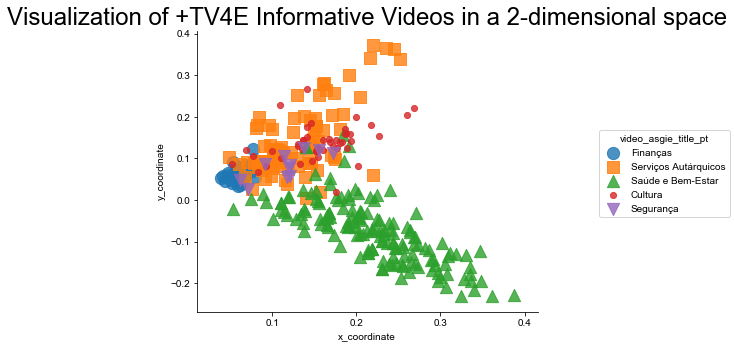

In [20]:
# plot!
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot("x_coordinate", "y_coordinate", hue="video_asgie_title_pt", data=df_videos, fit_reg=False, markers=markers_list, scatter_kws={"s": 150})
# Adjust borders and add title
sns.set(font_scale=2)
plt.title('Visualization of +TV4E Informative Videos in a 2-dimensional space')
plt.subplots_adjust(right=0.80, top=0.90, left=0.12, bottom=0.12)
# Show plot
plt.show()